## this notebook is for smoothing transmission spectra produced with Exo-Transmit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**here is a transit spectrum for TOI-1899 b**

In [2]:
# Can be found in kipping/Exo_Transmit/Spectra
# as of 19 Jan 2024
spectra_path = '/Users/coffey/Downloads/kipping/Exo_Transmit/Spectra'

In [3]:
TOI1899b_spec        = np.loadtxt(f'{spectra_path}/transmission_TOI1899b.dat', skiprows = 2).T
TOI1899b_wavelength  = TOI1899b_spec[0] * 1e6 # microns

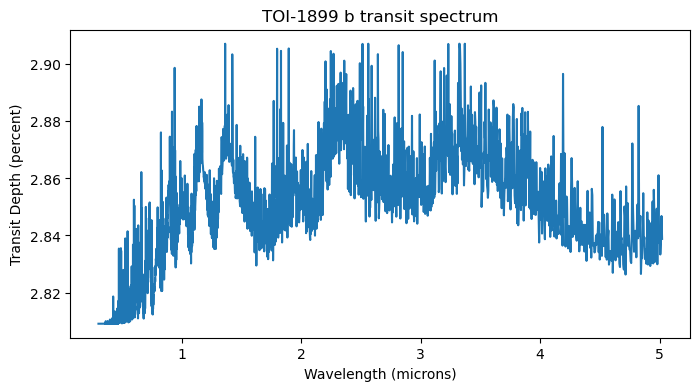

In [4]:
plt.figure(figsize = (8,4))
plt.title('TOI-1899 b transit spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transit Depth (percent)')

plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec[1][:2825])

plt.show()

**Exo-Transmit produces a spectrum from $0.3 - 30 \mu m$ at a fixed spectral resolution of $R = \lambda / \Delta\lambda = 1000$. JWST's NIRSPEC operates over a wavelength range of $0.6 - 5.3 \mu m$ at spectral resolutions of ~100 (prism), ~1000, and ~2700, depending on the observing mode.**

**first I'm gonna write a normal smoothing algorithm, then make it adaptive**

In [5]:
wavelength = TOI1899b_wavelength[:2825]
spectrum   = TOI1899b_spec[1][:2825]

In [6]:
num_points = len(wavelength)
num_points

2825

In [7]:
# arbitrary bin size
binn = 25

In [8]:
spectrum[:binn].mean()

2.809077

In [9]:
smooth_spec = []

In [10]:
for i in range(len(spectrum)):
    mean = spectrum[i:binn+i].mean()
    smooth_spec.append(mean)

**Plot to compare smoothed spectrum to original.**

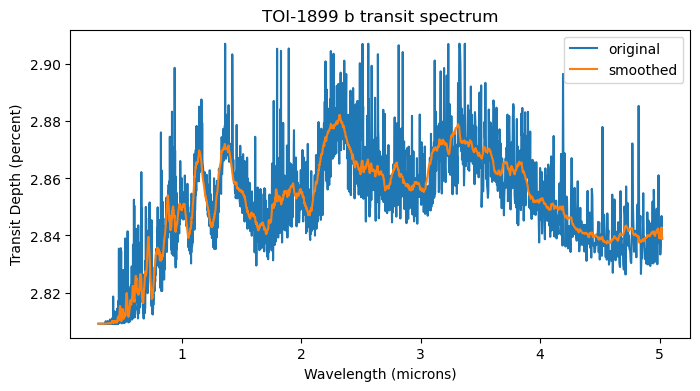

In [11]:
plt.figure(figsize = (8,4))
plt.title('TOI-1899 b transit spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transit Depth (percent)')

plt.plot(wavelength, spectrum, label = 'original')
plt.plot(wavelength, smooth_spec, label = 'smoothed')

plt.legend()
plt.show()

**Now make it adaptive smoothing**

To start, we need to find the center of the first bin. Since we will be using $\Delta\lambda = \lambda / R$, we know that the wavelength corresponding to the center of the first bin should follow this equation $\lambda - \Delta\lambda/2 = min(\lambda)$. Putting these together gives us $\lambda = [2R * min(\lambda)]/[2R - 1]$

In [12]:
# can tune to any spectra resolution you want
R = 1000

In [13]:
lamb0 = (2*R*wavelength[0]) / (2*R - 1)
lamb0

0.29991915957978993

**Now we can begin the adaptive binning**

In [14]:
dellamb = lamb0 / R
lamb0 - dellamb/2

0.2997692

In [15]:
bin_indices = np.where(np.logical_and(wavelength >= lamb0 - dellamb/2, wavelength < lamb0 + dellamb/2))

In [16]:
mean0 = spectrum[bin_indices].mean()
mean0

2.809077

In [17]:
adap_smooth_spec = [mean0]

In [18]:
for i in range(1,len(spectrum)):
    lamb = wavelength[i]
    dellamb = lamb / R
    bin_indices = np.where(np.logical_and(wavelength >= lamb - dellamb/2, wavelength < lamb + dellamb/2))
    mean = spectrum[bin_indices].mean()
    
    adap_smooth_spec.append(mean)

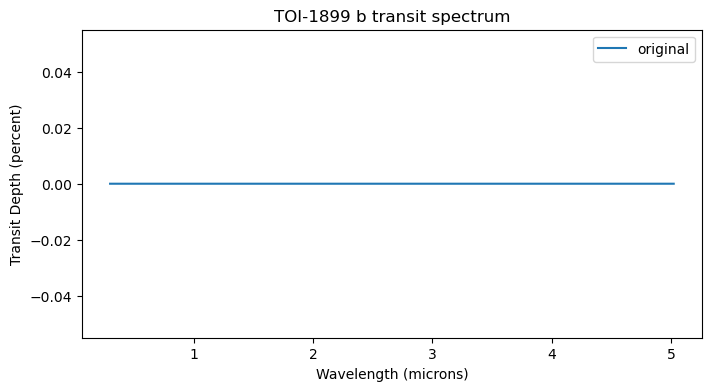

In [19]:
plt.figure(figsize = (8,4))
plt.title('TOI-1899 b transit spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transit Depth (percent)')

plt.plot(wavelength, spectrum - adap_smooth_spec, label = 'original')
#plt.plot(wavelength, smooth_spec, label = 'smoothed')
#plt.plot(wavelength, adap_smooth_spec, label = 'adaptive')

plt.legend()
plt.show()

In [20]:
np.sum(spectrum - adap_smooth_spec)

0.0